## Machine Learning types

### Supervised learning

The result/dependant variable is know and the idea is to find the replationship between dependent and independent variables. There are two types of Supervised machine learning (broadly speaking)

    - Regression - continuous dependent variable
    - Classification - discrete dependent variable
    
In this article lets look into the most prominent form of Supervised learning, i.e., **Linear Regression**

### Linear Regression

Lets look at different cases of linear regression starting from Simple Linear Regression i.e., a linear regression model with just one independent variable

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

#### Load the data and test, train split

In [44]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:] 

#### Fitting a simple linear regression model using the second column as independent variable

In [45]:
reg = LinearRegression()
model = reg.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = reg.predict(diabetes_X_test)

In [46]:
mean_squared_error(diabetes_y_test, diabetes_y_pred)

2548.07239872597

In [47]:
r2_score(diabetes_y_test, diabetes_y_pred)

0.47257544798227147

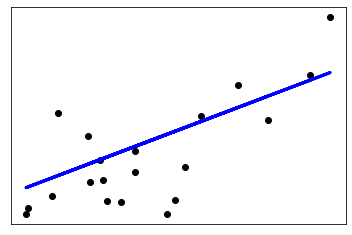

In [48]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [49]:
db_X, db_y = datasets.load_diabetes(return_X_y=True)
X_df = pd.DataFrame(db_X)

In [10]:
def get_pred_results(diabetes_X, diabetes_y):
    x_tr = diabetes_X[:-20]
    x_ts = diabetes_X[-20:]
    y_tr = diabetes_y[:-20]
    y_ts = diabetes_y[-20:]
    reg = LinearRegression()
    model = reg.fit(x_tr, y_tr)
    y_pred = reg.predict(x_ts)
    mse = mean_squared_error(y_ts, y_pred)
    r2_score1 = r2_score(y_ts, y_pred)
    print(f"mse: {mse} and r2_score: {r2_score1}")
    get_plots(x_ts, y_ts, y_pred)
    return mse, r2_score1

In [11]:
def get_plots(diabetes_X_test, diabetes_y_test, diabetes_y_pred):
    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

0
mse: 5472.264673097903 and r2_score: -0.13270201630620848


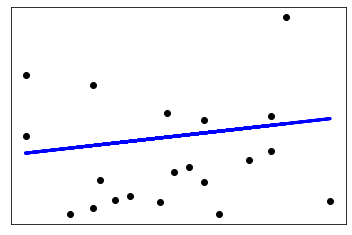

1
mse: 5501.908212234339 and r2_score: -0.13883792137588857


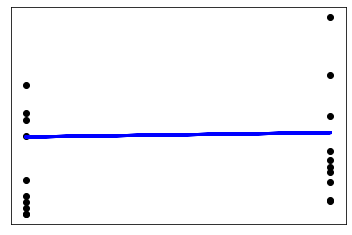

2
mse: 2548.07239872597 and r2_score: 0.47257544798227147


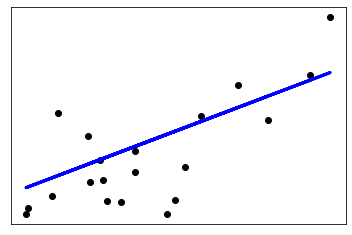

3
mse: 4058.4102891387315 and r2_score: 0.15995117339547205


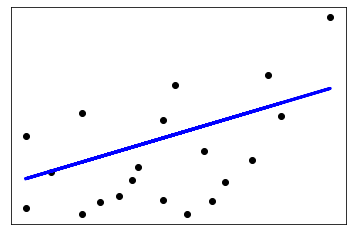

4
mse: 5608.695440956822 and r2_score: -0.16094176987655562


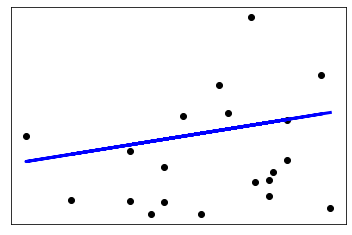

5
mse: 5564.137341655332 and r2_score: -0.15171870558113


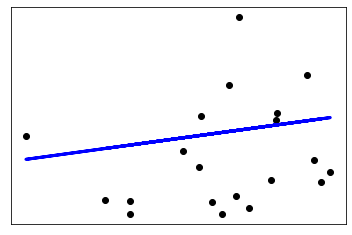

6
mse: 4538.3404560555455 and r2_score: 0.060610607792839555


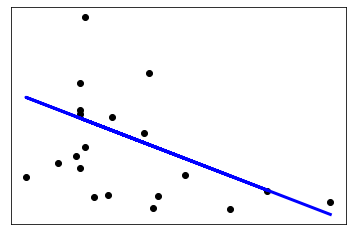

7
mse: 4850.824458833115 and r2_score: -0.004070338973065413


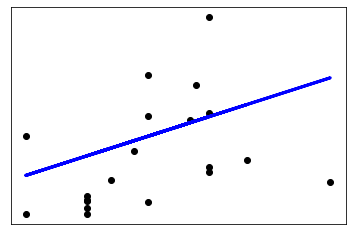

8
mse: 2923.342534244987 and r2_score: 0.3948984231023219


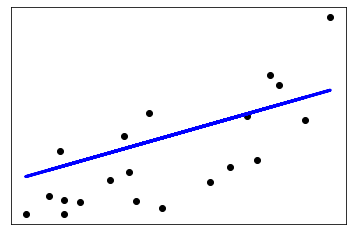

9
mse: 5265.499255567974 and r2_score: -0.08990371992812762


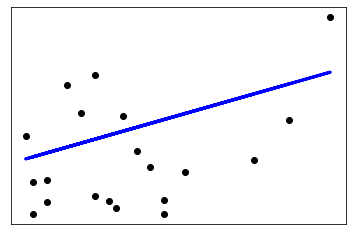

In [12]:
reg = LinearRegression()
mse = {}
r2 = {}
for i in range(0, X_df.shape[1]):
    print(i)
    db1_X = db_X[:, np.newaxis, i]
    mse_inter, r2_inter = get_pred_results(db1_X, db_y)
    mse[i] = mse_inter
    r2[i] = r2_inter


In [32]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
df = pd.DataFrame(diabetes_X)
df['y'] = diabetes_y
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
reg = LinearRegression()
model = reg.fit(train.drop("y" ,axis= 1), train['y'])
diabetes_y_pred = reg.predict(test.drop("y" ,axis= 1))

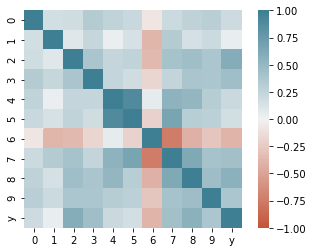

In [36]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# )

In [37]:
reg.coef_

array([  37.90031426, -241.96624835,  542.42575342,  347.70830529,
       -931.46126093,  518.04405547,  163.40353476,  275.31003837,
        736.18909839,   48.67112488])

In [39]:
mean_squared_error(test['y'], diabetes_y_pred)

2900.1732878832304

In [40]:
r2_score(test['y'], diabetes_y_pred)

0.4526066021617382